# 4.10. Final task

## Table of contents:

### 1. Importing data
### 2. Addressing PII data 
### 3. Creating a region groups
### 4. Exclusion of low-activity customers
### 5. + 6. Customer profiling and visulaizations
#### a) Age groups
#### b) Incone categpry
#### c) Family type
#### d) Multidimensional customer profile
#### e) Department preferencies
#### f) Day and hour
### 7. Customer profile aggregations


## Importing libraries

In [27]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 01. Importing data 

In [28]:
# Create folder path

path = r'/Users/edytakowal/Desktop/Instacart Basket Analysis'

In [29]:
# Import the final_df.pkl dataframe from the csv file

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_products_all.pkl'))

## 02. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

I did this in the previous task; I removed the columns containing name and surname because they are not relevant in our analysis.

## 03. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [30]:
# Print first 5 rows of df

df.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,order_hour,days_since_prior_order,add_to_cart_order,reordered,max_order,loyalty_flag,avg_product_price,spending_flag,median_order_freq,freq_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,9,30.0,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,15,11.0,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,15,10.0,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,9,NaN,1,0,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,11,30.0,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer


In [31]:
# Create region variables

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [32]:
# Create a new column with regions

df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(South), 'region'] = 'South'
df.loc[df['state'].isin(West), 'region'] = 'West'

In [33]:
# Check the output

df.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,days_since_prior_order,add_to_cart_order,reordered,max_order,loyalty_flag,avg_product_price,spending_flag,median_order_freq,freq_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,30.0,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,11.0,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,10.0,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,NaN,1,0,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,30.0,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


In [34]:
# Check the number of customers for each region

reg = df.groupby('region').user_id.nunique()

In [35]:
# Check the output 

reg

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

Text(0.5, 1.0, 'Customers by region')

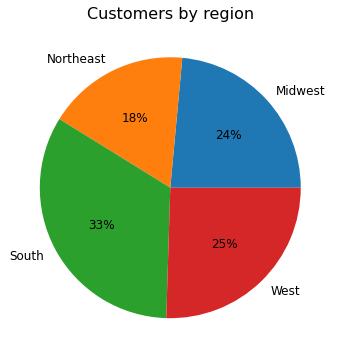

In [36]:
# Create a chart

reg_pie = reg.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6))

plt.title('Customers by region', fontsize = 16)

In [37]:
# Export chart outside of Jupyter in the form of an image file

reg_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_pie.png'))

In [38]:
# Check the number of orders for each region

reg_ord = df.groupby('region').order_id.nunique()

In [39]:
# Check the ooutput 

reg_ord

region
Midwest       754275
Northeast     567162
South        1071562
West          821686
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Orders by region')

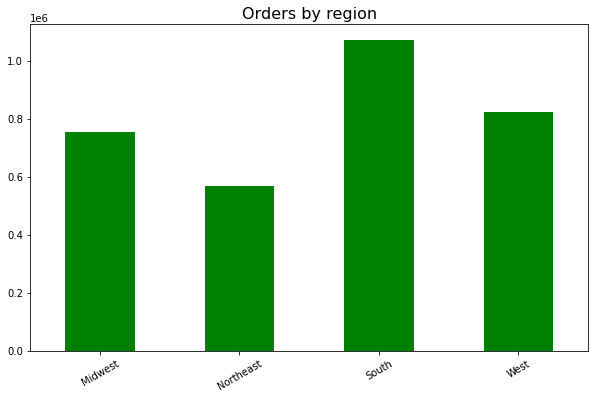

In [40]:
# Create a chart

reg_ord_bar = reg_ord.plot.bar(xlabel = (''), color = 'g', figsize = (10,6), rot = 30)
plt.title('Orders by region', fontsize = 16)

In [41]:
# Export chart outside of Jupyter in the form of an image file

reg_ord_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_ord_bar.png'))

In [42]:
# Craete a pivot table

gen_reg = pd.crosstab(index=df['region'], 
                          columns=df['gender'], 
                          values=df['user_id'], 
                          aggfunc='nunique')

In [43]:
# Check the output 

gen_reg

gender,Female,Male
region,,
Midwest,24182,24337
Northeast,17766,18622
South,34047,34690
West,26147,26418


Text(0.5, 1.0, 'Gender distribution by region')

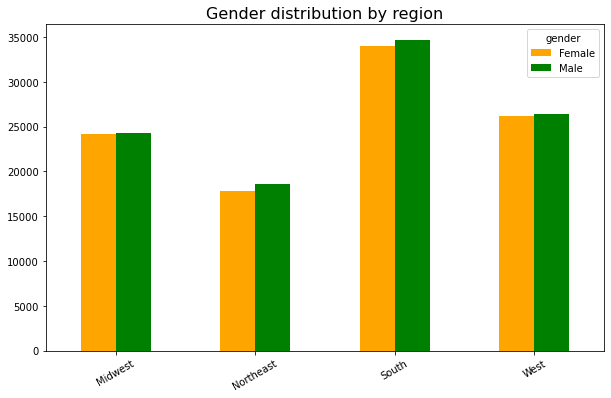

In [44]:
# Create a chart

colors = ['orange', 'green']

gen_reg_bar = gen_reg.plot.bar(xlabel = (''), color = colors, figsize = (10,6), rot = 30)

plt.title('Gender distribution by region', fontsize=16)

In [45]:
# Export chart outside of Jupyter in the form of an image file

gen_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gen_reg_bar.png'))

In [46]:
# Create a pivot table

spe_reg = pd.crosstab(index=df['region'], 
                          columns=df['spending_flag'], 
                          values=df['user_id'], 
                          aggfunc='nunique')

In [47]:
# Check the output

spe_reg

spending_flag,High spender,Low spender
region,,
Midwest,1263,47256
Northeast,881,35507
South,1815,66922
West,1392,51173


Text(0.5, 1.0, 'Low and high spenders by region')

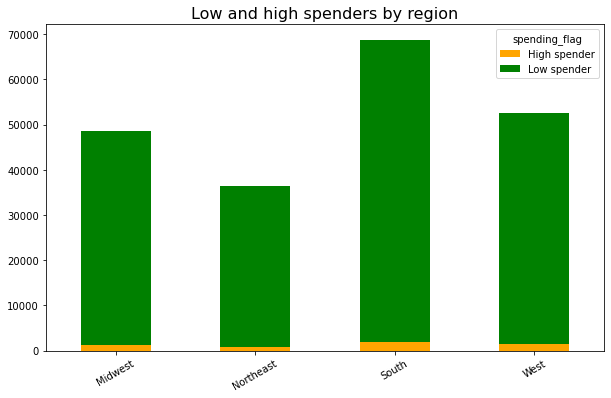

In [48]:
# Create a chart

colors = ['orange', 'green']

spe_reg_bar = spe_reg.plot.bar(stacked = True, xlabel = (''), color = colors, figsize = (10,6), rot = 30)

plt.title('Low and high spenders by region', fontsize=16)

In [49]:
# Export chart outside of Jupyter in the form of an image file

spe_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spe_reg_bar.png'))

In [50]:
# Number of orders taken by high and low spenders by region 

freq_reg = pd.crosstab(index = df['region'], 
                                        columns = df['freq_flag'], 
                                        values = df['user_id'], 
                                        aggfunc = 'nunique')

In [51]:
# Check the output

freq_reg

freq_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,20278,14063,14178
Northeast,15272,10444,10672
South,28867,19934,19935
West,22179,15178,15208


Text(0.5, 1.0, 'Frequent customers by region')

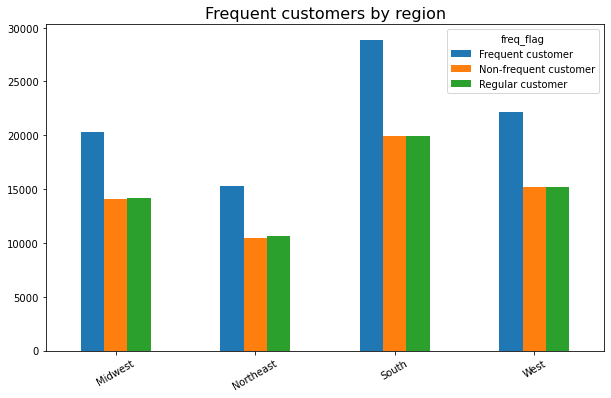

In [52]:
# Create a chart

freq_reg_bar = freq_reg.plot.bar(xlabel = (''), figsize = (10, 6), rot = 30)

plt.title('Frequent customers by region', fontsize=16)

In [53]:
# Export chart outside of Jupyter in the form of an image file

freq_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freq_reg_bar.png'))

In [54]:
# Number of orders taken by high and low spenders by region 

loy_reg = pd.crosstab(index = df['region'], 
                                    columns = df['loyalty_flag'], 
                                    values = df['user_id'], 
                                    aggfunc = 'nunique')

In [55]:
# Check the output 

loy_reg

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,3991,26333,18195
Northeast,3027,19869,13492
South,5637,37491,25609
West,4362,28635,19568


Text(0.5, 1.0, 'Loyal customers by region')

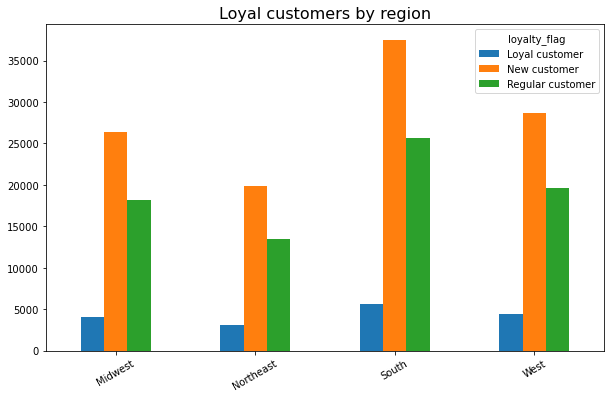

In [56]:
# Create a chart

loy_reg_bar = loy_reg.plot.bar(xlabel = (''), figsize = (10,6), rot = 30)

plt.title('Loyal customers by region', fontsize=16)

In [57]:
# Export chart outside of Jupyter in the form of an image file

loy_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loy_reg_bar.png'))

## 04. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [58]:
# Classify customers with orders number < 5 as 'low-active' category

df.loc[df['max_order'] < 5, 'activity'] = 'low-active'

In [59]:
# Classify customers with order number >= 5 as 'normal-active' category

df.loc[df['max_order'] >= 5, 'activity'] = 'normal-active'

In [60]:
# Check the number of normal and low- active customers

df.groupby('activity').user_id.nunique()

activity
low-active        43578
normal-active    162631
Name: user_id, dtype: int64

In [61]:
# Assign low active customers to new dataframe

low_active_customers = df[df['activity'] == 'low-active']

In [62]:
low_active_customers.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,add_to_cart_order,reordered,max_order,loyalty_flag,avg_product_price,spending_flag,median_order_freq,freq_flag,region,activity
729,168851,Male,South Carolina,30,1/1/2017,0,single,63712,102,Danish Butter Cookies,...,1,0,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low-active
730,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,3,0,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low-active
731,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,2,1,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low-active
732,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,1,1,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low-active
733,168851,Male,South Carolina,30,1/1/2017,0,single,63712,196,Soda,...,2,0,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low-active


In [63]:
# Check the shape of low_active_customers df

low_active_customers.shape

(1440295, 28)

In [64]:
# Assign normal active customers to new dataframe

active_customers = df[df['activity'] == 'normal-active']

In [65]:
active_customers.head()

,user_id,gender,state,age,joining_date,n_dependants,fam_status,income,product_id,product_name,...,add_to_cart_order,reordered,max_order,loyalty_flag,avg_product_price,spending_flag,median_order_freq,freq_flag,region,activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,1,0,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,normal-active


In [66]:
active_customers.shape

(30964564, 28)

In [67]:
# Export low_active_customers df

low_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_active_customers.pkl'))

## 05. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


### a) Age groups

In [68]:
# Check the min value for column 'age'

active_customers['age'].min()

'18'

In [69]:
# Check the max value for column 'age'

active_customers['age'].max()

'81'

In [70]:
# Change the data type for age column

# Change data type of new columns to 'category'

active_customers['age'] = active_customers['age'].astype('int')

<ipython-input-70-40806de9b60c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers['age'] = active_customers['age'].astype('int')


In [71]:
# Create a new column with age groups 

active_customers.loc[active_customers['age'] <= 29, 'age_group'] = '18-29'
active_customers.loc[(active_customers['age'] > 29) & 
                     (active_customers['age'] < 40), 'age_group'] = '30-39'
active_customers.loc[(active_customers['age'] > 39) & 
                     (active_customers['age'] < 50), 'age_group'] = '40-49'
active_customers.loc[(active_customers['age'] > 49) & 
                     (active_customers['age'] < 65), 'age_group'] = '50-65'
active_customers.loc[(active_customers['age'] >= 65), 'age_group'] = '65+'



/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [72]:
# Check the frequency of age_group column

active_customers.groupby('age_group').user_id.nunique()

age_group
18-29    30376
30-39    25284
40-49    25697
50-65    38024
65+      43250
Name: user_id, dtype: int64

In [73]:
# Create a variable 

age = active_customers.groupby('age_group').user_id.nunique()

Text(0.5, 1.0, 'Customers by age group')

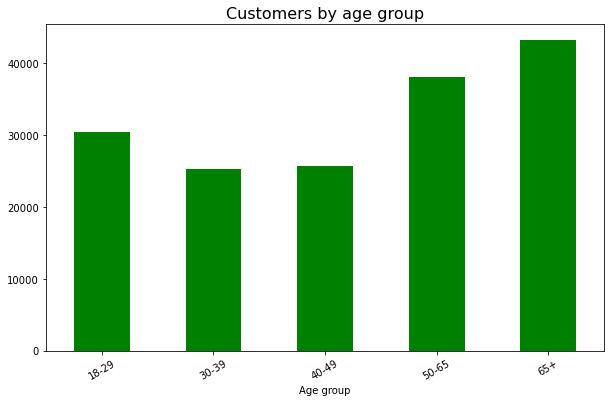

In [74]:
# Create plot to show age groups frequency

age_bar = age.plot.bar(xlabel = ('Age group'), color = 'g', figsize = (10, 6), rot = 30)

plt.title('Customers by age group', fontsize = 16)

In [75]:
# Export chart outside of Jupyter in the form of an image file

age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))

Text(0.5, 1.0, 'Customers by age group')

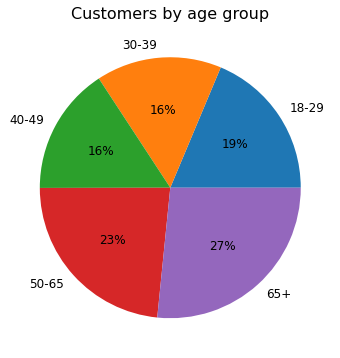

In [76]:
# Create a pie chart

age_pie = age.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6), title = 'Customers by family status')

plt.title('Customers by age group', fontsize = 16)

In [77]:
# Export chart outside of Jupyter in the form of an image file

age_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_pie.png'))

In [78]:
# Create a pivot table

age_reg = pd.crosstab(index = active_customers['age_group'], 
                                    columns = active_customers['region'], 
                                    values = active_customers['user_id'], 
                                    aggfunc = 'nunique')

In [79]:
# Check the output 

age_reg

region,Midwest,Northeast,South,West
age_group,,,,
18-29,7062,5261,10267,7786
30-39,5917,4510,8439,6418
40-49,6221,4545,8445,6486
50-65,9007,6685,12609,9723
65+,10169,7580,14433,11068


Text(0.5, 1.0, 'Customers by age group and region')

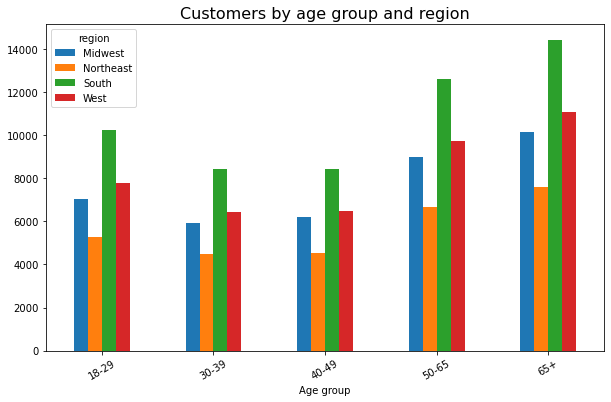

In [80]:
# Create a chart 

age_reg_bar = age_reg.plot.bar(xlabel = ('Age group'), figsize = (10, 6), rot = 30)

plt.title('Customers by age group and region', fontsize = 16)

In [81]:
# Export chart outside of Jupyter in the form of an image file

age_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_reg_bar.png'))

In [82]:
# Assigh a name for each age group

active_customers.loc[active_customers['age_group'] == '18-29', 'age_group_name'] = 'young adult'
active_customers.loc[active_customers['age_group'] == '30-39', 'age_group_name'] = 'adult'
active_customers.loc[active_customers['age_group'] == '40-49', 'age_group_name'] = 'middle-aged adult'
active_customers.loc[active_customers['age_group'] == '50-65', 'age_group_name'] = 'late middle-aged adult'
active_customers.loc[active_customers['age_group'] == '65+', 'age_group_name'] = 'senior'

/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


KeyboardInterrupt: 

In [ ]:
# Check the frequency of age_group_name column

active_customers.groupby('age_group_name').user_id.nunique()

### b) Income category

In [ ]:
# Check min value for income column

active_customers['income'].min()

In [ ]:
# Check max value for income column

active_customers['income'].max()

In [ ]:
# Create a new column with income categories

active_customers.loc[active_customers['income'] <= 50000, 'income_category'] = 'low-income'
active_customers.loc[(active_customers['income'] > 50000) & 
                     (active_customers['income'] < 100000), 'income_category'] = 'middle-income'
active_customers.loc[(active_customers['income'] >= 100000) & (active_customers['income'] < 300000), 'income_category'] = 'upper-income'
active_customers.loc[(active_customers['income'] >= 300000), 'income_category'] = 'high-income'

In [ ]:
# Create a variable which stores unique number of user_id for each income_category

inc = active_customers.groupby('income_category').user_id.nunique()

In [ ]:
# Check the output 

inc

In [ ]:
# Create a pie chart

inc_pie = inc.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6), title = 'Customers by family status')

plt.title('Customers by income category', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

inc_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_pie.png'))

In [ ]:
# Create a pivot table that shows count of customers with income category in each age group

inc_age = pd.crosstab(index = active_customers['age_group'], 
                          columns = active_customers['income_category'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

In [ ]:
# Create a chart 

inc_age.bar = inc_age.plot.bar(title = 'Customers by income category and age group', rot = 30, figsize = (10, 6))

plt.title('Customers by income category and age group', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

inc_age.bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_age.bar.png'))

In [ ]:
# Create a pivot table 

inc_reg = pd.crosstab(index = active_customers['region'], 
                          columns = active_customers['income_category'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

In [ ]:
# Create a chart

inc_reg_bar = inc_reg.plot.bar(title = 'Customers by income category and region', rot = 30, figsize = (10, 6))

plt.title('Customers by income category and region', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

inc_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_reg_bar.png'))

### c) Household type 

In [ ]:
active_customers.head()

In [ ]:
# Create a variable

fam = active_customers.groupby('fam_status').user_id.nunique()

In [ ]:
# Check the output 

fam

In [ ]:
# Create a pie chart 

fam_pie = fam.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6), title = 'Customers by family status')

plt.title('Customers by family status', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

fam_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_pie.png'))

In [ ]:
# Create a variable

dep = active_customers.groupby('n_dependants').user_id.nunique()

In [ ]:
# check the output 

dep

In [ ]:
# Export chart outside of Jupyter in the form of an image file

dep_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_pie.png'))

In [ ]:
# Create a 'living with parents' category within new family_type column

active_customers.loc[(active_customers['fam_status'] == 'living with parents and siblings'), 
                     'household_type'] = 'living with parents'

In [ ]:
# Create a 'one-person household' category within new family_type column

active_customers.loc[(active_customers['fam_status'].isin(['single', 'divorced/widowed'])) & 
                         (active_customers['n_dependants'] == 0), 'household_type'] = 'one-person household'

In [ ]:
# Create a 'single with dependant/s' category within new family_type column

active_customers.loc[(active_customers['fam_status'].isin(['single', 'divorced/widowed'])) & 
                        (active_customers['n_dependants'] > 0), 'household_type'] = 'single with dependants'

In [ ]:
# Create a 'marriage without dependants' category within new family_type column

active_customers.loc[(active_customers['fam_status'] == 'married') & 
                     (active_customers['n_dependants'] == 0), 'household_type'] = 'marriage without dependants' 

In [ ]:
# Create a family category within new family_type column

active_customers.loc[(active_customers['fam_status'] == 'married') & 
                     (active_customers['n_dependants'] == 1), 'household_type'] = 'small family' 

In [ ]:
# Create a 'mid family' category within new family_type column

active_customers.loc[(active_customers['fam_status'] == 'married') & 
                     (active_customers['n_dependants'] == 2), 'household_type'] = 'medium family' 

In [ ]:
# Create a 'big family' category within new family_type column

active_customers.loc[(active_customers['fam_status'] == 'married') & 
                     (active_customers['n_dependants'] == 3), 'household_type'] = 'large family' 

In [ ]:
# Create a variable with unique number of users for each household_type

hou = active_customers.groupby('household_type').user_id.nunique()

In [ ]:
# Check the output 

hou

In [ ]:
# Create a pie chart to demonstrate % distribution of customers by household type


hou_pie = hou.plot.pie(ylabel = (''), autopct = '%.0f%%', fontsize = 12, figsize = (10, 6))

plt.title('Customers by household type', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

hou_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hou_pie.png'))

In [ ]:
# Create a pivot table

inc_hou = pd.crosstab(index = active_customers['income_category'],
                          columns = active_customers['household_type'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

In [ ]:
# Check the output

inc_hou

In [ ]:
# Create a plot 

inc_hou_bar = inc_hou.plot.bar(xlabel = (''), title = 'Customers by household type and income category', rot = 30, figsize = (10, 6))

plt.title('Customers by household type and income category', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

inc_hou_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_hou_bar.png'))

In [ ]:
# Create a pivot table

inc_hou_ord = pd.crosstab(index = active_customers['income_category'],
                          columns = active_customers['household_type'], 
                          values = active_customers['order_id'], 
                          aggfunc = 'nunique')

In [ ]:
# Check the output

inc_hou_ord

In [ ]:
# Create a plot

inc_hou_ord_bar = inc_hou_ord.plot.bar(xlabel = (''), title = 'Orders by household type and income category', rot = 30, figsize = (10, 6))

plt.title('Orders by household type and income category', fontsize = 16)


In [ ]:
# Export chart outside of Jupyter in the form of an image file

inc_hou_ord_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_hou_ord_bar.png'))

In [ ]:
# Create a pivot table 

reg_hou = pd.crosstab(index = active_customers['region'],
                          columns = active_customers['household_type'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

In [ ]:
# Check the output 

reg_hou

In [ ]:
# Create a plot

reg_hou_bar = reg_hou.plot.bar(xlabel = (''), title = 'Customers by state and household type', rot = 30, figsize = (10, 6))

plt.title('Customers by state and household type', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

reg_hou_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_hou_bar.png'))

In [ ]:
# Create a pivot table

hou_spe = pd.crosstab(index = active_customers['household_type'],
                          columns = active_customers['spending_flag'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

In [ ]:
# Check the output 

hou_spe

In [ ]:
# Create a chart

hou_spe_bar = hou_spe.plot.bar(xlabel = (''), title = 'Spenders by household type', rot = 30, figsize = (10, 6))

plt.title('Spenders by household type', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

hou_spe_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hou_spe_bar.png'))

In [ ]:
# Create a pivot table

hou_loy = pd.crosstab(index = active_customers['household_type'],
                          columns = active_customers['loyalty_flag'], 
                          values = active_customers['user_id'], 
                          aggfunc = 'nunique')

In [ ]:
# Check the output 

hou_loy

In [ ]:
# Create a plot

hou_loy_bar = hou_loy.plot.bar(xlabel = (''), title = 'Loyal customers by household type', rot = 30, figsize = (10, 6))

plt.title('Loyal customers by household type', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

hou_loy_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hou_loy_bar.png'))

### Multidimensional customer profile 

In [ ]:
active_customers.columns

In [ ]:
# Combine the categories created above to create a multidimensional customer profile

# Young single combined

active_customers.loc[(active_customers['age_group_name'] == 'young adult') & 
                     (active_customers['income_category'] == 'low-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'working class young single'
active_customers.loc[(active_customers['age_group_name'] == 'young adult') & 
                     (active_customers['income_category'] == 'middle-income') &
                     (active_customers['household_type'].isin(['living with parent', 'one-person household'])), 
                     'household_class&type'] = 'middle class young single'
active_customers.loc[(active_customers['age_group_name'] == 'young adult') & 
                     (active_customers['income_category'] == 'upper-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'upper-middle class young single'
active_customers.loc[(active_customers['age_group_name'] == 'young adult') & 
                     (active_customers['income_category'] == 'high-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'higher class young single'


In [ ]:
# Single combined

active_customers.loc[(active_customers['age_group_name'] != 'young adult') & 
                     (active_customers['income_category'] == 'low-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'working class single'
active_customers.loc[(active_customers['age_group_name'] != 'young adult') & 
                     (active_customers['income_category'] == 'middle-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'middle class single'
active_customers.loc[(active_customers['age_group_name'] != 'young adult') & 
                     (active_customers['income_category'] == 'upper-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'upper-middle class single'
active_customers.loc[(active_customers['age_group_name'] != 'young adult') & 
                     (active_customers['income_category'] == 'high-income') &
                     (active_customers['household_type'].isin(['living with parents', 'one-person household'])), 
                     'household_class&type'] = 'higher class single'

In [ ]:
# Small family combined  

active_customers.loc[(active_customers['income_category'] == 'low-income') &
                     (active_customers['household_type'] == 'small family'),
                      'household_class&type'] = 'working class small family' 
active_customers.loc[(active_customers['income_category'] == 'middle-income') &
                     (active_customers['household_type'] == 'small family'),
                      'household_class&type'] = 'middle class small family'
active_customers.loc[(active_customers['income_category'] == 'upper-income') &
                     (active_customers['household_type'] == 'small family'),
                      'household_class&type'] = 'upper-middle class small family' 
active_customers.loc[(active_customers['income_category'] == 'high-income') &
                     (active_customers['household_type'] == 'small family'),
                      'household_class&type'] = 'upper class small family'

In [ ]:
# Medium family combined

active_customers.loc[(active_customers['income_category'] == 'low-income') &
                     (active_customers['household_type'] == 'medium family'),
                      'household_class&type'] = 'working class medium family' 
active_customers.loc[(active_customers['income_category'] == 'middle-income') &
                     (active_customers['household_type'] == 'medium family'),
                      'household_class&type'] = 'middle class medium family'
active_customers.loc[(active_customers['income_category'] == 'upper-income') &
                     (active_customers['household_type'] == 'medium family'),
                      'household_class&type'] = 'upper-middle class medium family' 
active_customers.loc[(active_customers['income_category'] == 'high-income') &
                     (active_customers['household_type'] == 'medium family'),
                      'household_class&type'] = 'upper class medium family'

In [ ]:
# Large family combined

active_customers.loc[(active_customers['income_category'] == 'low-income') &
                     (active_customers['household_type'] == 'large family'),
                      'household_class&type'] = 'working class large family' 
active_customers.loc[(active_customers['income_category'] == 'middle-income') &
                     (active_customers['household_type'] == 'large family'),
                      'household_class&type'] = 'middle class large family'
active_customers.loc[(active_customers['income_category'] == 'upper-income') &
                     (active_customers['household_type'] == 'large family'),
                      'household_class&type'] = 'upper-middle class large family' 
active_customers.loc[(active_customers['income_category'] == 'high-income') &
                     (active_customers['household_type'] == 'large family'),
                      'household_class&type'] = 'upper class large family'

In [ ]:
# Check frequency for household_class&type column

hou_cla_typ = active_customers.groupby('household_class&type').user_id.nunique()

In [ ]:
# Check the output 

hou_cla_typ

In [ ]:
# Create a chart

hou_cla_typ_bar = hou_cla_typ.plot.barh(xlabel = (''), color = 'g', figsize=(15,6))

plt.title('Distribution of Household Types and Classes', fontsize = 16)


In [ ]:
# Export chart outside of Jupyter in the form of an image file

hou_cla_typ_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hou_cla_typ_bar.png'))

In [ ]:
# Check the first 5 row of df

active_customers.head()

In [ ]:
active_customers.dtypes

In [ ]:
# Change data type of new columns to 'category'

active_customers[['region', 'activity', 'income_category', 'household_type', 'age_group_name', 'household_class&type']] = active_customers[['region', 'activity', 'income_category', 'household_type', 'age_group_name', 'household_class&type']].astype('category')

### e) Departaments preferencies

In [ ]:
# Import the departments.csv dataframe from the csv file

deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [ ]:
# Check the output

deps

In [ ]:
# Change the header

new_header = ['department_id', 'department']

In [ ]:
# Alocate new header

deps.columns = new_header

In [ ]:
# Check the output

deps

In [ ]:
# Merge departments with active_customers df using 'department_id' column as a key

active_customers = active_customers.merge(deps, on = 'department_id', indicator = True)

In [ ]:
# Print the first 5 rows of active_customers df

active_customers.head()

In [ ]:
# Change data type for department column

active_customers['department'] = active_customers['department'].astype('category')

In [ ]:
# Remove the _merge column

active_customers.drop(columns = ['_merge'], inplace = True)

In [ ]:
# Create a variable that counts frequency of department  

dep = active_customers['department'].value_counts(dropna = False)

In [ ]:
# Check the output

dep

In [ ]:
# Create a chart which shows distribution of the “department” column

dep_bar = dep.sort_values(ascending=True).plot.barh(xlabel = (''), title = 'Distribution of departments', color = 'g', figsize = (20, 10))

plt.title('Distribution of departments', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_bar.png'))

In [ ]:
# Create a pivot table with department preferencies by household_class&type (agg sum of spendings)

hous_dep = pd.crosstab(index=active_customers['household_class&type'],
                      columns=active_customers['department'], 
                      values=active_customers['prices'], 
                      aggfunc='count')

In [ ]:
# Check the output

hous_dep

In [ ]:
# Create a pivot table with department preferencies by age group

age_dep = pd.crosstab(index=active_customers['department'],
                      columns=active_customers['age_group'], 
                      values=active_customers['prices'], 
                      aggfunc='count')

In [ ]:
# Check the output

age_dep

In [ ]:
# Sort values 

age_dep = age_dep.loc[age_dep.sum(axis=1).sort_values(ascending=True).index]

In [ ]:
# Create a chart

age_dep_bar = age_dep.plot.barh(xlabel = (''), stacked = True, figsize=(20,10))

plt.title('Departments preferencies by age group', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

age_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dep_bar.png'))

In [ ]:
# Create a pivot table with department preferencies by income category

inc_dep = pd.crosstab(index=active_customers['department'],
                      columns=active_customers['income_category'], 
                      values=active_customers['prices'], 
                      aggfunc='count')

In [ ]:
# Sort values 

inc_dep = inc_dep.loc[inc_dep.sum(axis=1).sort_values(ascending=True).index]

In [ ]:
# Create a chart

inc_dep_bar = inc_dep.plot.barh(xlabel = (''), stacked = True, figsize=(20, 10))

plt.title('Departments by income category', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

inc_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_dep_bar.png'))

In [ ]:
# Create a pivot table

reg_dep = pd.crosstab(index=active_customers['department'],
                      columns=active_customers['region'], 
                      values=active_customers['prices'], 
                      aggfunc='count')

In [ ]:
# Check the output 

reg_dep

In [ ]:
# Sort values 

reg_dep = reg_dep.loc[reg_dep.sum(axis=1).sort_values(ascending=True).index]

In [ ]:
# Create a chart

reg_dep_bar = reg_dep.plot.barh(xlabel = (''), stacked = True, figsize=(20,10))

plt.title('Departments by regions', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

reg_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_dep_bar.png'))

In [ ]:
# Create a pivot table

gen_dep = pd.crosstab(index=active_customers['department'],
                      columns=active_customers['gender'], 
                      values=active_customers['prices'], 
                      aggfunc='count')

In [ ]:
# Check the output 

gen_dep

In [ ]:
# Sort values 

gen_dep = gen_dep.loc[gen_dep.sum(axis=1).sort_values(ascending=True).index]

In [ ]:
# Create a chart 

color = ('orange', 'green')

gen_dep_bar = gen_dep.plot.barh(xlabel = (''), stacked = True, color=color, figsize=(20, 10))

plt.title('Departments by gender', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

gen_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gen_dep_bar.png'))

### Day and hour

In [ ]:
# Assign day do orders_day_of_week

active_customers.loc[(active_customers['orders_day_of_week'] == 0), 'day'] = '6 saturday'
active_customers.loc[(active_customers['orders_day_of_week'] == 1), 'day'] = '7 sunday'
active_customers.loc[(active_customers['orders_day_of_week'] == 2), 'day'] = '1 monday'
active_customers.loc[(active_customers['orders_day_of_week'] == 3), 'day'] = '2 tuesday'
active_customers.loc[(active_customers['orders_day_of_week'] == 4), 'day'] = '3 wednesday'
active_customers.loc[(active_customers['orders_day_of_week'] == 5), 'day'] = '4 thursday'
active_customers.loc[(active_customers['orders_day_of_week'] == 6), 'day'] = '5 friday'


In [ ]:
# Check the first 5 rows of df

active_customers.head()

In [ ]:
# Create a variable that groups unique number of orders taken each day

day = active_customers.groupby('day').order_id.nunique()

In [ ]:
# Check the output 

day

In [ ]:
# Create a chart

day_bar = day.plot.bar(xlabel = (''), rot = 30, color = 'g', figsize=(10,6))

plt.title('Count of orders by day of the week', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'day_bar.png'))

In [ ]:
# Create a pivot table that shows unique number of orders taken by day of the week and age group

day_age = pd.crosstab(index=active_customers['day'], 
                      columns=active_customers['age_group'], 
                      values=active_customers['order_id'], 
                      aggfunc='nunique')

In [ ]:
# Check the output

day_age

In [ ]:
# Create a chart 

day_age_bar = day_age.plot.bar(xlabel = (''), rot = 30, figsize=(10,6))

plt.title('Count of orders by age group and day of the week', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

day_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'day_age_bar.png'))

In [ ]:
# Create a pivot table that shows unique number of orders taken by day of the week and region

day_reg = pd.crosstab(index=active_customers['day'], 
                      columns=active_customers['region'], 
                      values=active_customers['order_id'], 
                      aggfunc='nunique')

In [ ]:
# Check the output

day_reg

In [ ]:
# Create a chart

day_reg_bar = day_reg.plot.bar(xlabel = (''), rot = 30, figsize=(10,6))

plt.title('Count of orders by region and day of the week', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

day_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'day_reg_bar.png'))

In [ ]:
# Create a variable that groups unique number of orders taken each hour

hour = active_customers.groupby('order_hour').order_id.nunique()

In [ ]:
# Check the output

hour

In [ ]:
# Create a chart

hour_bar = hour.plot.bar(xlabel = (''), title = 'Total number of orders taken, by hour', rot = 360, color = 'orange', figsize=(20,6))

plt.title('Total count of orders by hour', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_bar.png'))

In [ ]:
# Create a pivot table that shows unique number of orders taken by hour and age group

hour_age = pd.crosstab(index=active_customers['order_hour'], 
                      columns=active_customers['age_group'], 
                      values=active_customers['order_id'], 
                      aggfunc='nunique')

In [ ]:
# Check the output

hour_age.head()

In [ ]:
# Create a chart 

hour_age_bar = hour_age.plot.bar(xlabel = ('Hour'), rot = 30, figsize=(20,6))

plt.title('Total count of orders by hour and age group', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

hour_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_age_bar.png'))

In [ ]:
# Create a pivot table that shows unique number of orders taken by hour and region

hour_reg = pd.crosstab(index=active_customers['order_hour'], 
                      columns=active_customers['region'], 
                      values=active_customers['order_id'], 
                      aggfunc='nunique')

In [ ]:
# Check the output 

hour_reg.head()

In [ ]:
# Create a chart 

hour_reg_bar = hour_reg.plot.bar(xlabel = ('Hour'), rot = 30, figsize=(20,6))

plt.title('Total count of orders by hour and region', fontsize = 16)

In [ ]:
# Export chart outside of Jupyter in the form of an image file

hour_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_reg_bar.png'))

In [ ]:
# Export dataframe to pkl

active_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_customers.pkl'))

## 06. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [ ]:
# Apply the agg() function to each 'age_group' to obtain the min, max, mean values for columns

active_customers.groupby('age_group').agg({
    'user_id' : ['nunique'],
    'order_id' : ['nunique',  'mean'],
    'income': ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean']})

In [ ]:
# Apply the agg() function to each 'region' to obtain the min, max, mean values for columns

active_customers.groupby('region').agg({
    'user_id' : ['nunique'],
    'order_id' : ['nunique', 'mean'],
    'income': ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

In [ ]:
# Apply the agg() function to each 'income_category' to obtain the min, max, mean values for columns

active_customers.groupby('income_category').agg({
    'user_id' : ['nunique'], 
    'order_id' : ['nunique', 'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

In [ ]:
# Apply the agg() function to each 'household_type' to obtain the min, max, mean values for columns

active_customers.groupby('household_type').agg({
    'user_id' : ['nunique'],
    'order_id' : ['nunique', 'mean'],
    'income' : ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

In [ ]:
# Apply the agg() function to each 'household_class&type' to obtain the min, max, mean values for columns

active_customers.groupby('household_class&type').agg({
    'user_id' : ['nunique'],
    'order_id' : ['nunique',  'mean'],
    'income' : ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

In [ ]:
# Apply the agg() function to each 'loyalty_flag' to obtain the min, max, mean values for columns


active_customers.groupby('loyalty_flag').agg({
    'user_id' : ['nunique'], 
    'order_id' : ['nunique', 'mean'],
    'income' : ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

In [ ]:
# Apply the agg() function to each 'spending_flag' to obtain the min, max, mean values for columns

active_customers.groupby('spending_flag').agg({
    'user_id' : ['nunique'], 
    'order_id' : ['nunique', 'mean'],
    'income' : ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

In [ ]:
# Apply the agg() function to each 'freq_flag' to obtain the min, max, mean values for columns

active_customers.groupby('freq_flag').agg({
    'user_id' : ['nunique'],
    'order_id' : ['nunique', 'mean'],
    'income' : ['min', 'max',  'mean'],
    'prices': ['min', 'max',  'mean'],
    'days_since_prior_order' : ['min', 'max',  'mean'],
    'age' : ['min', 'max',  'mean']})

## Export 

In [ ]:
# Export active_customers df as pkl file

active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))